# (1 of 2) EDA
---
# AirBnB
# Regression: Linear Regression, SVR
---

### If we have some room for rent, how much rent to charge?

I'll create a model to predict the rent price, based on city, room type, accommodation, bathrooms and beds.

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Select only the first nrows = 10 rows to look at a glance of our value.

In [3]:
df = pd.read_csv('./dataset/listings.csv',nrows = 10)

In [4]:
pd.options.display.max_columns = None
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220305031505,2022-03-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,44%,18%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,5,5,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",$150.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,30,60,77,334,2022-03-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.32
1,5121,https://www.airbnb.com/rooms/5121,20220305031505,2022-03-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1,1,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",$60.00,30,730,30,30,730,730,30.0,730.0,NaN,t,30,60,90,365,2022-03-05,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220305031505,2022-03-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,25%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1,1,"['email', 'phone', 'reviews']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2,"[""Dryer"", ""Carbon monoxide alarm"", ""Kitchen"", ...",$275.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,201,2022-03-05,2,1,0,2014-01-02,2021-08-08,5.00,5.00,5.00,5.00,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220305031505,20

In [5]:
pd.reset_option('display.max_columns')

### Select only the column we must use.

In [6]:
df = pd.read_csv('./dataset/listings.csv',
                 usecols=['neighbourhood_group_cleansed',
                          'room_type','accommodates',
                          'bathrooms_text','beds','price',
                          'minimum_nights','maximum_nights',
                         ])

In [7]:
df.sample(5)

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights
10003,Brooklyn,Entire home/apt,2,2 baths,1.0,$140.00,2,1125
25086,Manhattan,Private room,1,1 shared bath,3.0,$40.00,10,100
21583,Brooklyn,Entire home/apt,5,1.5 baths,2.0,$175.00,1,3
31589,Manhattan,Entire home/apt,2,1 bath,1.0,$130.00,2,28
27535,Manhattan,Entire home/apt,2,1 bath,1.0,$135.00,30,365


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  37631 non-null  object 
 1   room_type                     37631 non-null  object 
 2   accommodates                  37631 non-null  int64  
 3   bathrooms_text                37535 non-null  object 
 4   beds                          36612 non-null  float64
 5   price                         37631 non-null  object 
 6   minimum_nights                37631 non-null  int64  
 7   maximum_nights                37631 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.3+ MB


## Data Cleaning and Transformation

#### Find the unique value of each feature.
To see which strange value needs to fix.

In [9]:
df['neighbourhood_group_cleansed'].value_counts()

Manhattan        16086
Brooklyn         14367
Queens            5640
Bronx             1203
Staten Island      335
Name: neighbourhood_group_cleansed, dtype: int64

In [10]:
df['room_type'].value_counts()

Entire home/apt    20362
Private room       16500
Shared room          571
Hotel room           198
Name: room_type, dtype: int64

In [11]:
df['accommodates'].value_counts()

2     17277
1      6020
4      5865
3      3703
6      1773
5      1541
8       532
7       354
10      176
16      136
12       92
9        61
11       25
14       22
0        22
15       17
13       15
Name: accommodates, dtype: int64

We have accommodates = 0.

In [12]:
df[df['accommodates']==0]

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights
23363,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365
23887,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365
24061,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365
24103,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365
24104,Manhattan,Hotel room,0,NaN,NaN,$0.00,1,28
24197,Manhattan,Hotel room,0,NaN,NaN,$0.00,1,365
24205,Manhattan,Hotel room,0,NaN,NaN,$0.00,7,28
24220,Manhattan,Hotel room,0,NaN,NaN,$0.00,1,365
24221,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365
24222,Manhattan,Hotel room,0,NaN,NaN,$0.00,30,365


Rows that have accommodates = 0 mean no one can check in so that's shouldn't possible.  
Furthermore, rows that have accommodates = 0 also have prices equal to 0 USD.  
It's possible that they're wrong keyed values, so I'll remove these.  

In [13]:
df = df[df['accommodates']!=0]

Check if any row has the price equal to 0 USD, we found none.

In [14]:
df[df['price']==0]

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights


Make every value start with a number because we'll use string splitting and make a new feature as float type.

In [15]:
df['bathrooms_text'].value_counts()

1 bath               19402
1 shared bath         9133
1 private bath        2845
2 baths               2199
2 shared baths        1078
1.5 baths             1013
1.5 shared baths       671
2.5 baths              309
3 baths                197
0 shared baths         129
3 shared baths         118
2.5 shared baths        98
3.5 baths               84
4 baths                 61
0 baths                 47
Half-bath               43
4 shared baths          29
4.5 baths               21
Shared half-bath        14
Private half-bath       11
5 baths                  8
6 baths                  7
5.5 baths                3
4.5 shared baths         3
7 baths                  2
3.5 shared baths         2
6 shared baths           2
7.5 baths                2
8 baths                  1
15 baths                 1
6.5 baths                1
15.5 baths               1
Name: bathrooms_text, dtype: int64

In [16]:
df['bathrooms_text'].replace('Half-bath','0.5 baths', inplace=True)
df['bathrooms_text'].replace('Shared half-bath','0.5 shared baths', inplace=True)
df['bathrooms_text'].replace('Private half-bath','0.5 baths', inplace=True)

In [17]:
df.dropna(subset=['bathrooms_text'], inplace=True)

In [18]:
df['baths'] = df['bathrooms_text'].apply(lambda x: x.split(' ')[0])

Change column 'baths' into float. 

In [19]:
df['baths'] = df['baths'].astype(float)

If 'bathrooms' didn't specify as a shared or private, I'll assume it as a private. If it's shared, the room owners should specify it as a shared.

In [20]:
# list comprehension
df['shared-baths'] = [1 if x=='shared' else 0 \
                      for x in df['bathrooms_text'].apply(lambda x: x.split(' ')[1])]

shared-baths = 0 means private bathrooms

In [21]:
df[df['shared-baths']==0].sample(5)

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,baths,shared-baths
23276,Queens,Private room,2,1 bath,1.0,$125.00,1,28,1.0,0
29472,Manhattan,Private room,3,1 private bath,1.0,$65.00,4,1125,1.0,0
3669,Manhattan,Entire home/apt,2,1 bath,1.0,$175.00,30,1125,1.0,0
32618,Queens,Entire home/apt,5,1 bath,2.0,$295.00,1,28,1.0,0
18148,Brooklyn,Entire home/apt,3,1 bath,1.0,$325.00,5,30,1.0,0


shared-baths = 1 means shared bathrooms

In [22]:
df[df['shared-baths']==1].sample(5)

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,baths,shared-baths
1306,Brooklyn,Private room,3,1 shared bath,2.0,$60.00,30,1125,1.0,1
35607,Brooklyn,Private room,2,1.5 shared baths,1.0,$95.00,2,365,1.5,1
25085,Brooklyn,Private room,2,1 shared bath,1.0,$31.00,30,1125,1.0,1
19829,Manhattan,Private room,2,1 shared bath,2.0,$75.00,2,20,1.0,1
4220,Manhattan,Private room,1,1 shared bath,1.0,$50.00,2,365,1.0,1


In [23]:
df.drop(['bathrooms_text'],axis=1,inplace=True)

### Missing Value Handling

<AxesSubplot:>

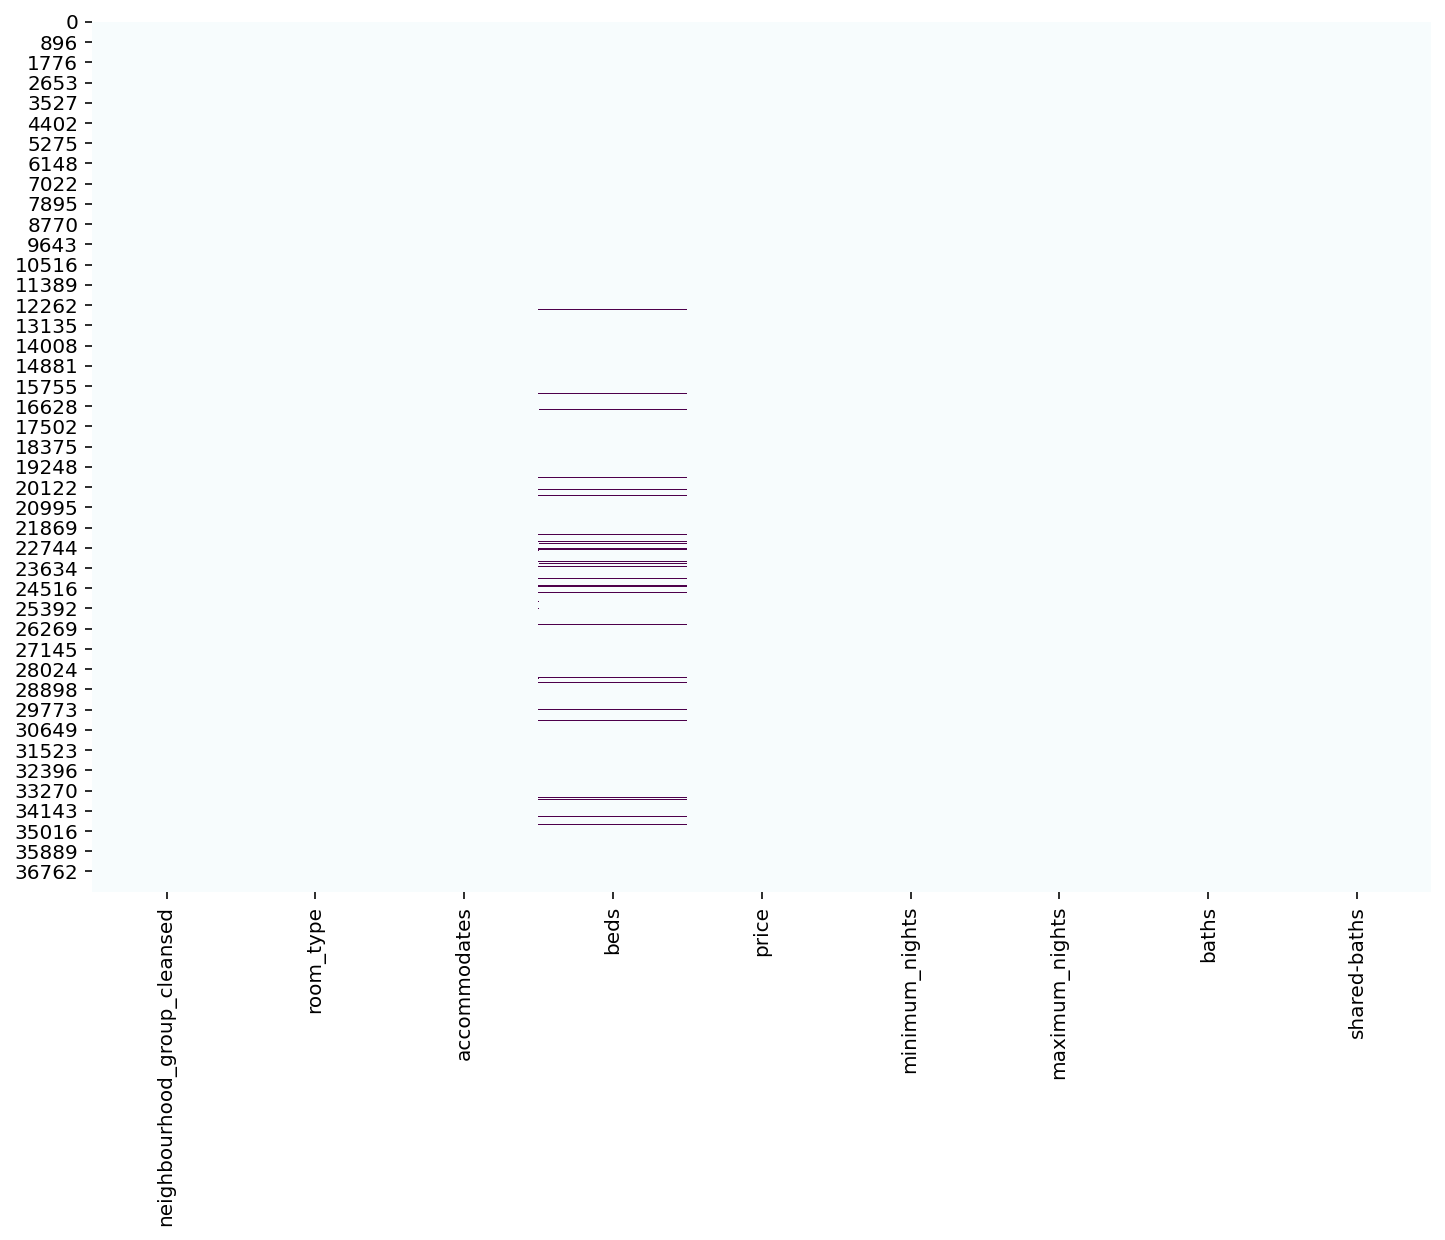

In [24]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='BuPu')

In [25]:
df['beds'].value_counts()

1.0     23470
2.0      8109
3.0      2926
4.0      1237
5.0       402
6.0       213
7.0        81
8.0        55
9.0        29
12.0       15
10.0       13
11.0        8
16.0        3
13.0        2
18.0        1
17.0        1
21.0        1
25.0        1
42.0        1
24.0        1
14.0        1
Name: beds, dtype: int64

In [26]:
df['beds'].mode()

0    1.0
dtype: float64

I found that mode is equal to 1 bed.

In [27]:
df['beds'].mean()

1.6024883784522832

In [28]:
df['beds'].median()

1.0

I found that mean is equal to 1.6 bed and median is equal to 1 bed.

In general, I'll fill null with mode.  
But this time, mode = median = 1 is better.  

So, I'll fill it with 1 bed.

In [29]:
df['beds'].fillna(value=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37535 entries, 0 to 37630
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  37535 non-null  object 
 1   room_type                     37535 non-null  object 
 2   accommodates                  37535 non-null  int64  
 3   beds                          37535 non-null  float64
 4   price                         37535 non-null  object 
 5   minimum_nights                37535 non-null  int64  
 6   maximum_nights                37535 non-null  int64  
 7   baths                         37535 non-null  float64
 8   shared-baths                  37535 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 2.9+ MB


#### Data Transformation for the rest

In [31]:
df['beds'] = df['beds'].astype(int)

df['shared-baths'] = df['shared-baths'].astype('category')

In [32]:
# Remove dollar and comma signs from price column
df['price'].replace({'\$':'', ',':''}, regex = True, inplace=True)

# Convert string to float
df['price'] = df['price'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37535 entries, 0 to 37630
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   neighbourhood_group_cleansed  37535 non-null  object  
 1   room_type                     37535 non-null  object  
 2   accommodates                  37535 non-null  int64   
 3   beds                          37535 non-null  int64   
 4   price                         37535 non-null  float64 
 5   minimum_nights                37535 non-null  int64   
 6   maximum_nights                37535 non-null  int64   
 7   baths                         37535 non-null  float64 
 8   shared-baths                  37535 non-null  category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 2.6+ MB


---
# Exploratory Data Analysis
---

### Examine the distribution of each column

In [34]:
df.describe().style.format("{:.2f}")

,accommodates,beds,price,minimum_nights,maximum_nights,baths
count,37535.00,37535.00,37535.00,37535.00,37535.00,37535.00
mean,2.84,1.59,166.35,20.50,58907.39,1.16
std,1.91,1.10,306.91,29.30,11085338.92,0.46
min,1.00,1.00,10.00,1.00,1.00,0.00
25%,2.00,1.00,69.00,2.00,60.00,1.00
50%,2.00,1.00,113.00,30.00,367.00,1.00
75%,4.00,2.00,180.00,30.00,1125.00,1.00
max,16.00,42.00,10000.00,1250.00,2147483647.00,15.50


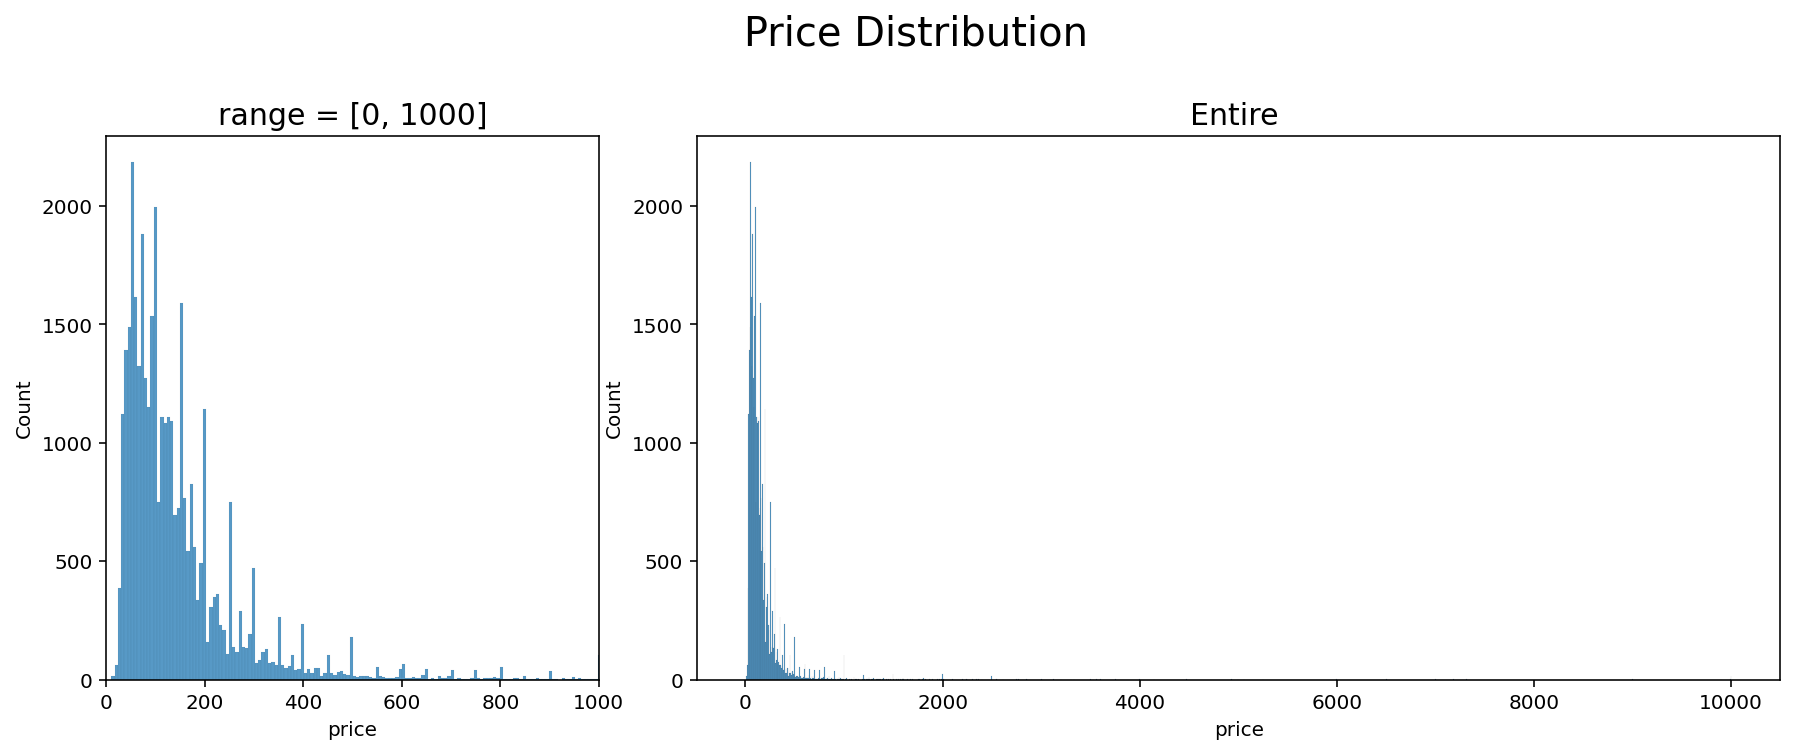

In [35]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(x=df['price'])
plt.xlim(0,1000)
plt.xlabel('price')
plt.title('range = [0, 1000]', fontsize=15)

plt.subplot(1,3,(2,3))
sns.histplot(x=df['price'])
plt.title('Entire ', fontsize=15)

plt.suptitle('Price Distribution', fontsize=20, y=1.05)
plt.show()

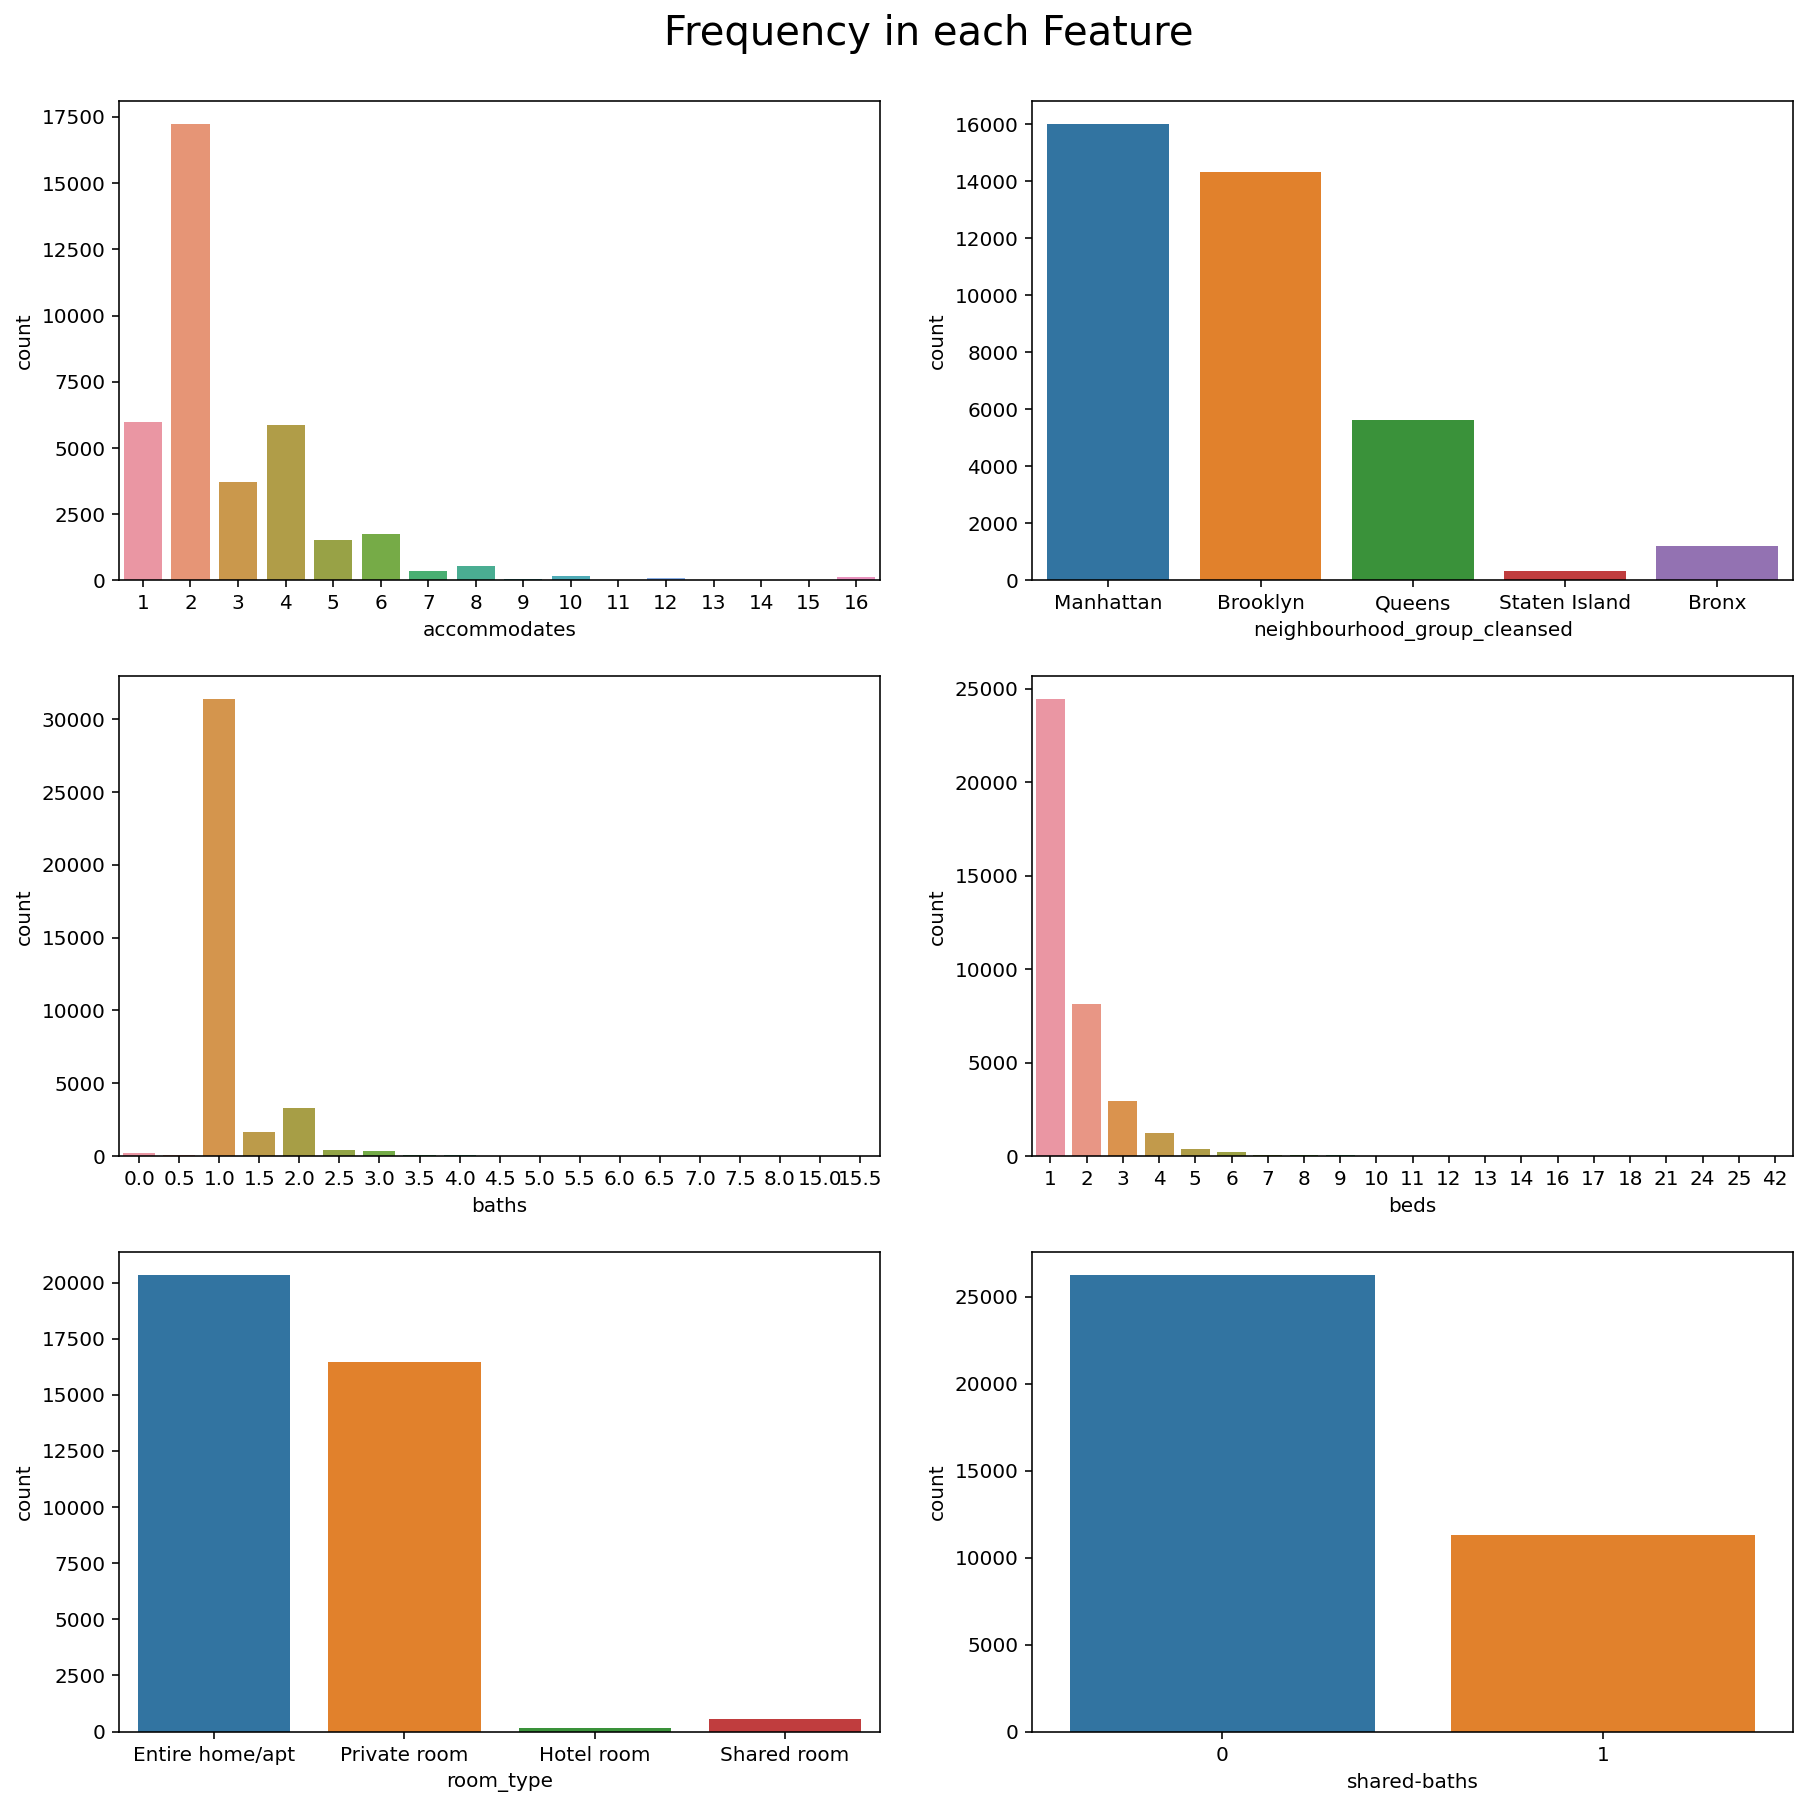

In [36]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

sns.countplot(x=df['accommodates'], ax=ax[0,0])
sns.countplot(x=df['neighbourhood_group_cleansed'], ax=ax[0,1])
sns.countplot(x=df['baths'], ax=ax[1,0])
sns.countplot(x=df['beds'], ax=ax[1,1])
sns.countplot(x=df['room_type'], ax=ax[2,0])
sns.countplot(x=df['shared-baths'], ax=ax[2,1])

fig.suptitle('Frequency in each Feature', fontsize=20, y=0.92)
plt.show()

### Examine the correlation

I won't drop_first=True yet, because I want to find the correlation.  
(But when I train the model, I'll drop_first=True to get rid of Multi-collinearity)

In [37]:
df2 = pd.get_dummies(df, drop_first=False)

In [38]:
df2.sample(5)

,accommodates,beds,price,minimum_nights,maximum_nights,baths,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,shared-baths_0,shared-baths_1
30581,2,1,250.0,6,1125,1.0,0,1,0,0,0,1,0,0,0,1,0
11930,2,1,50.0,30,60,1.0,0,1,0,0,0,0,0,1,0,0,1
9781,6,4,188.0,30,1125,1.0,0,0,1,0,0,1,0,0,0,1,0
4177,1,1,60.0,30,30,1.0,0,0,0,1,0,0,0,1,0,1,0
13575,2,1,57.0,21,75,1.0,0,0,1,0,0,0,0,1,0,0,1


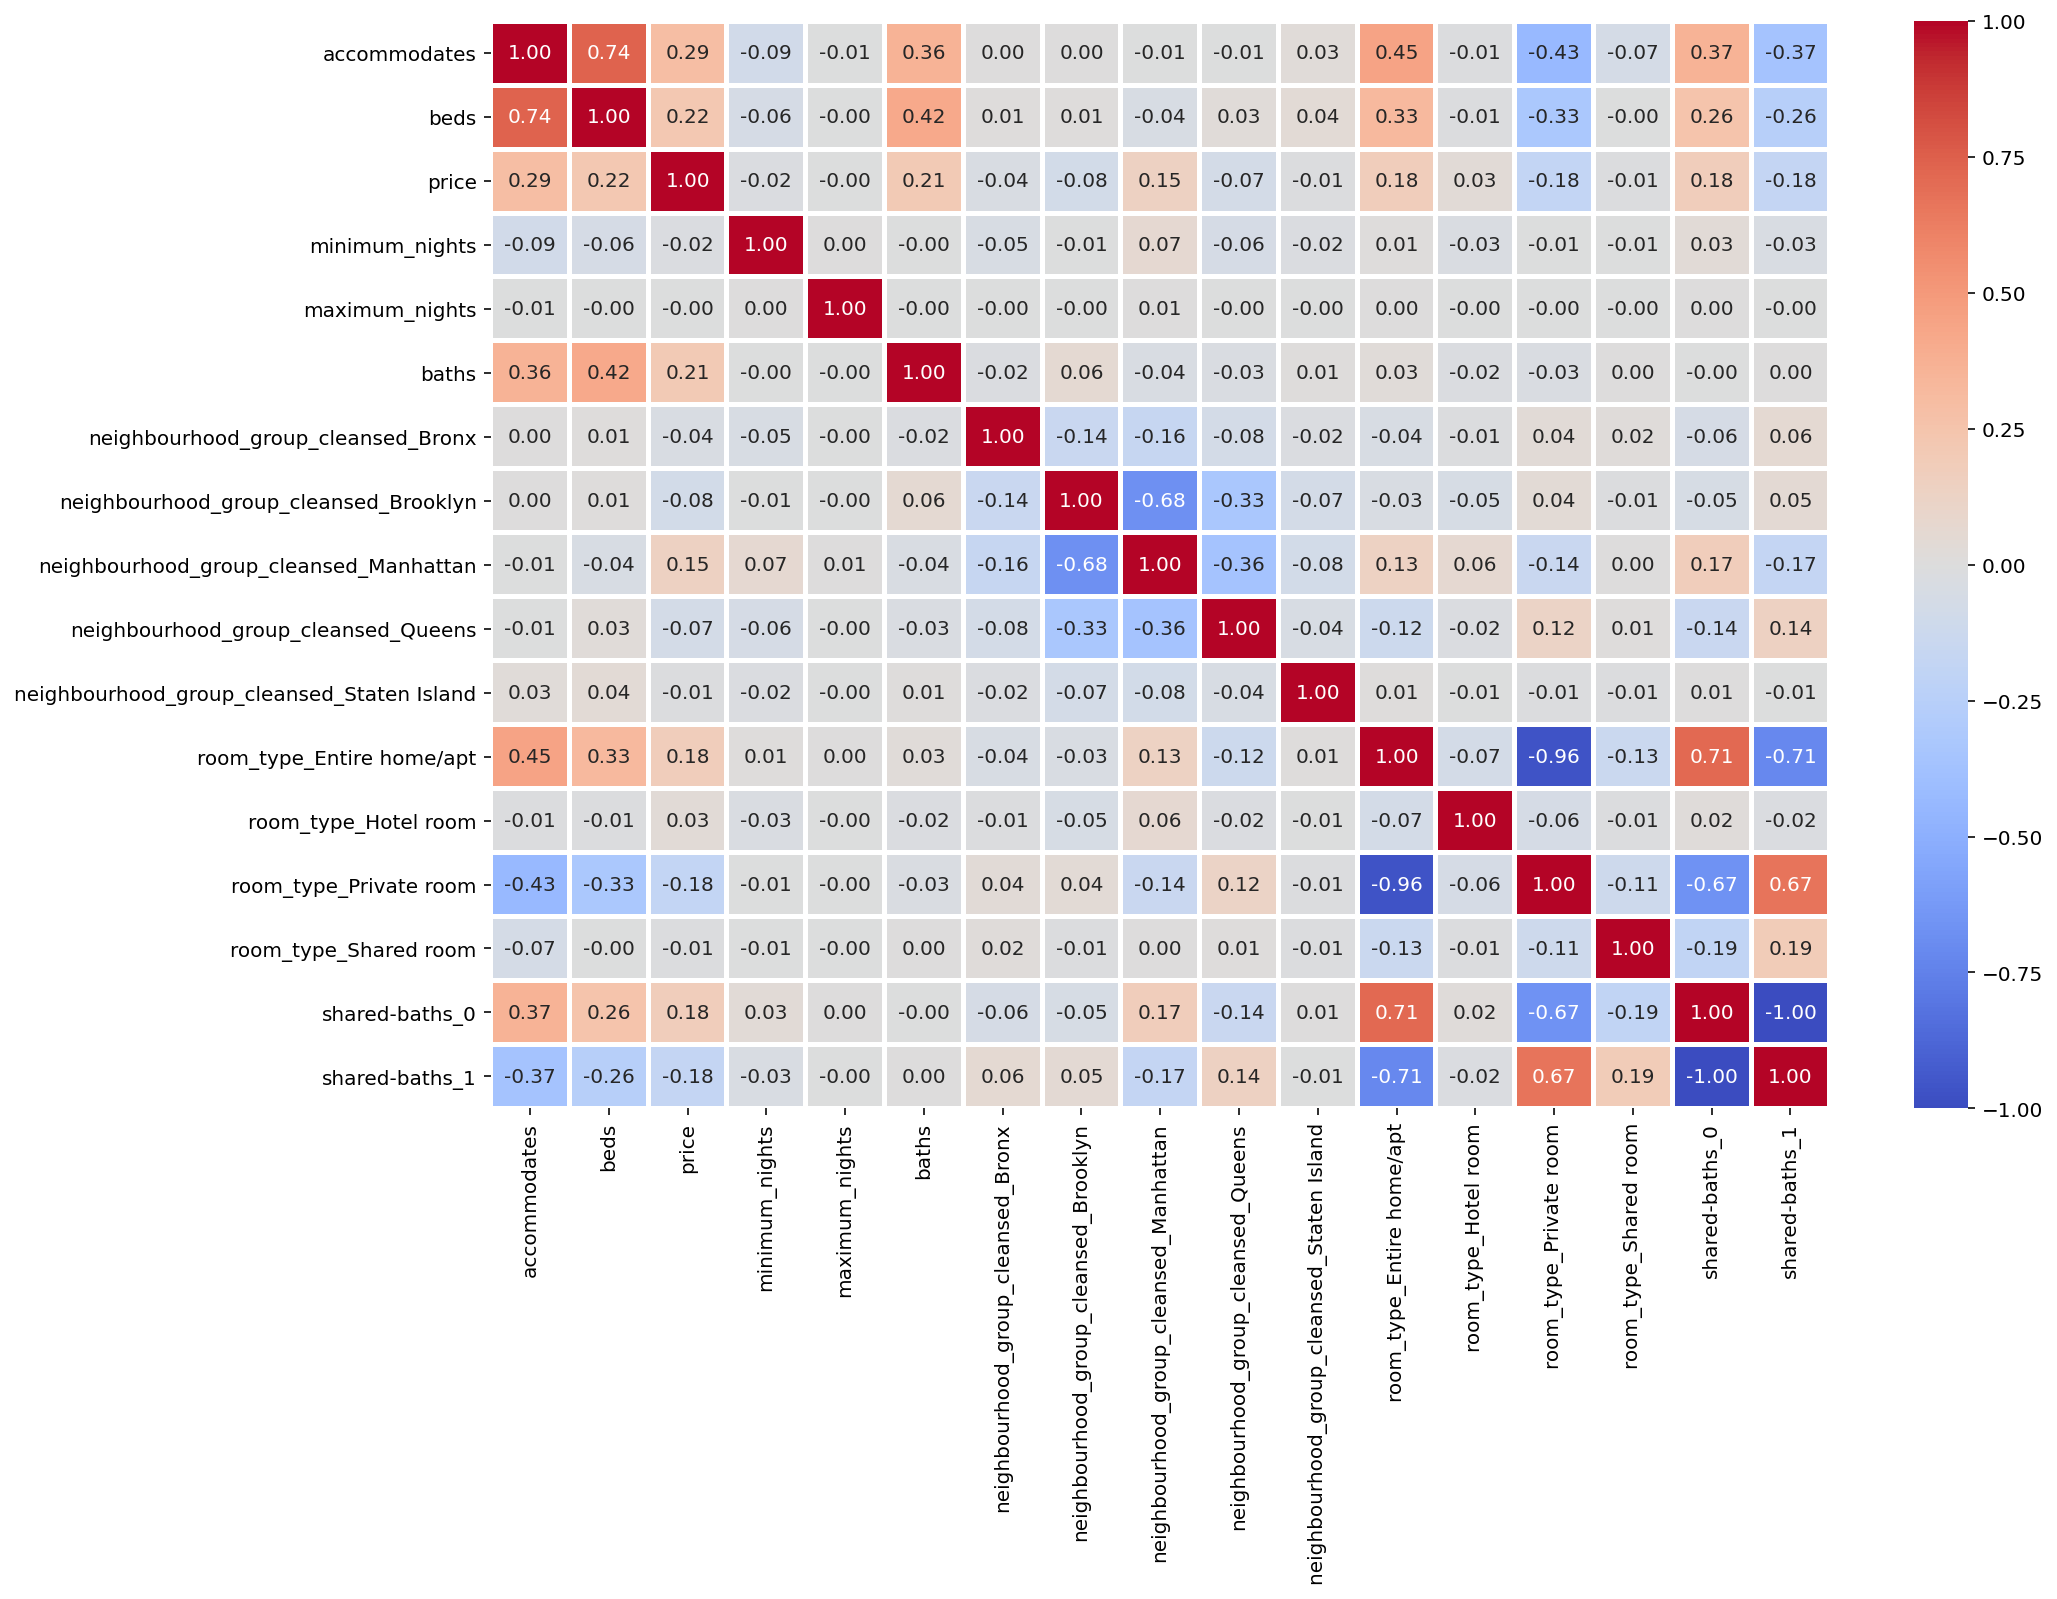

In [39]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, fmt='.2f',
            cmap='coolwarm', linecolor='white', linewidths=2)
plt.show()

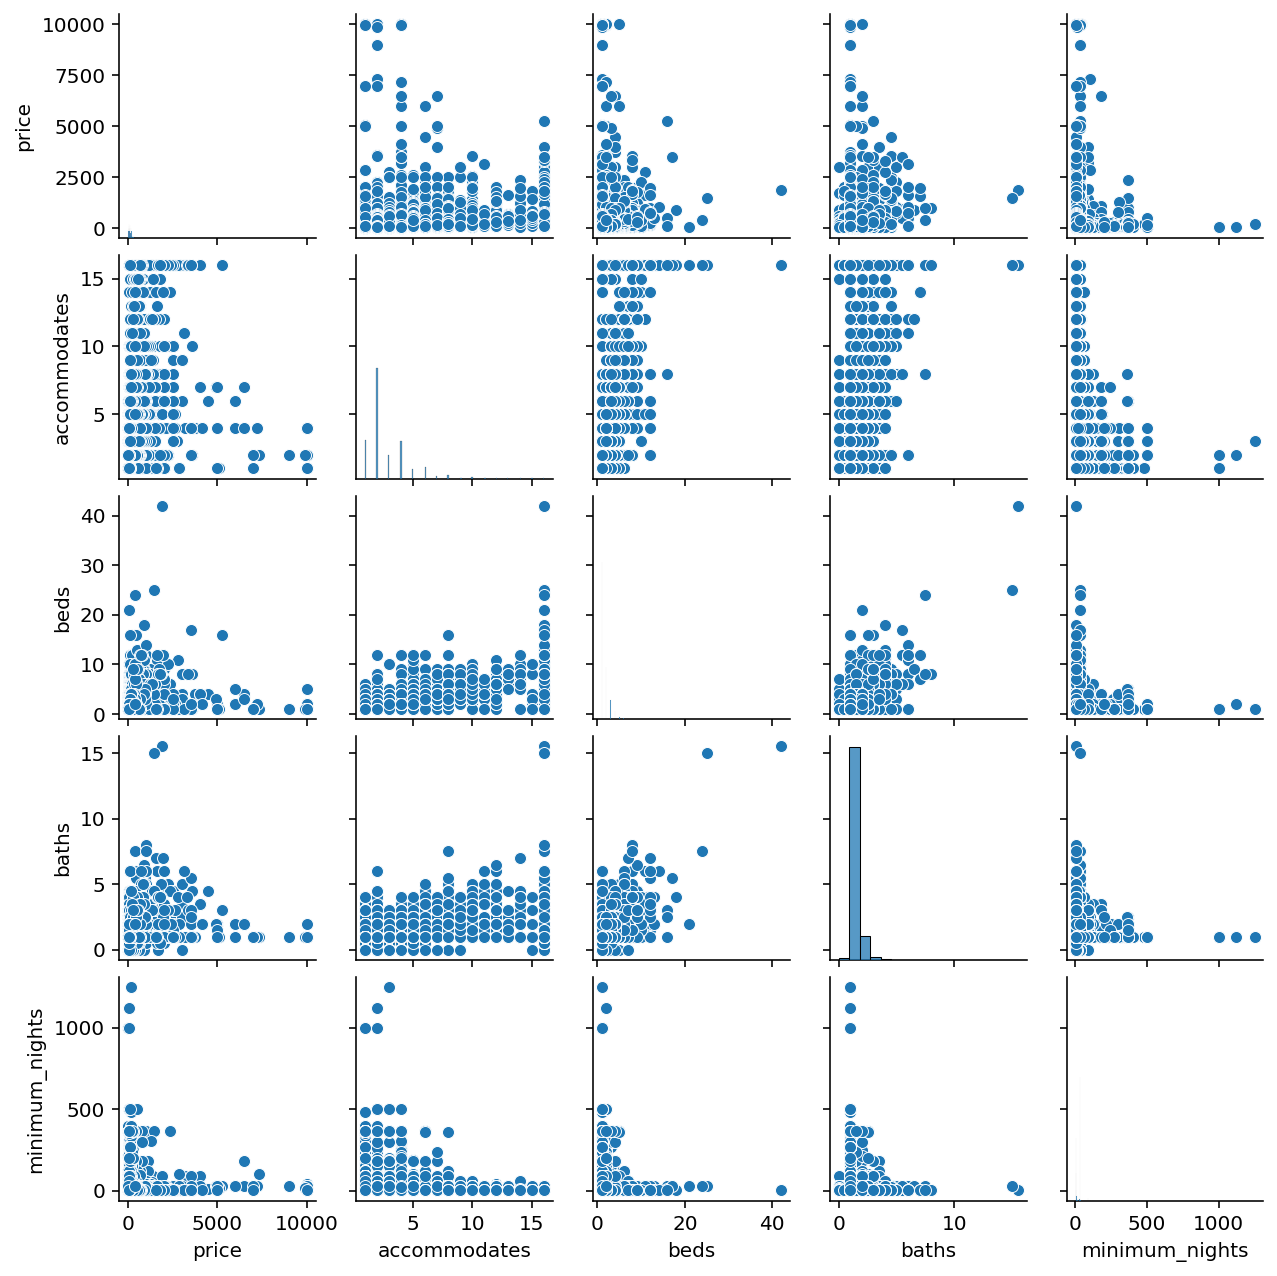

In [40]:
sns.pairplot(df2[['price','accommodates','beds','baths',
                  'minimum_nights']], height=1.8)
plt.show()

### Room types and bedroom types for each Neighborhood.

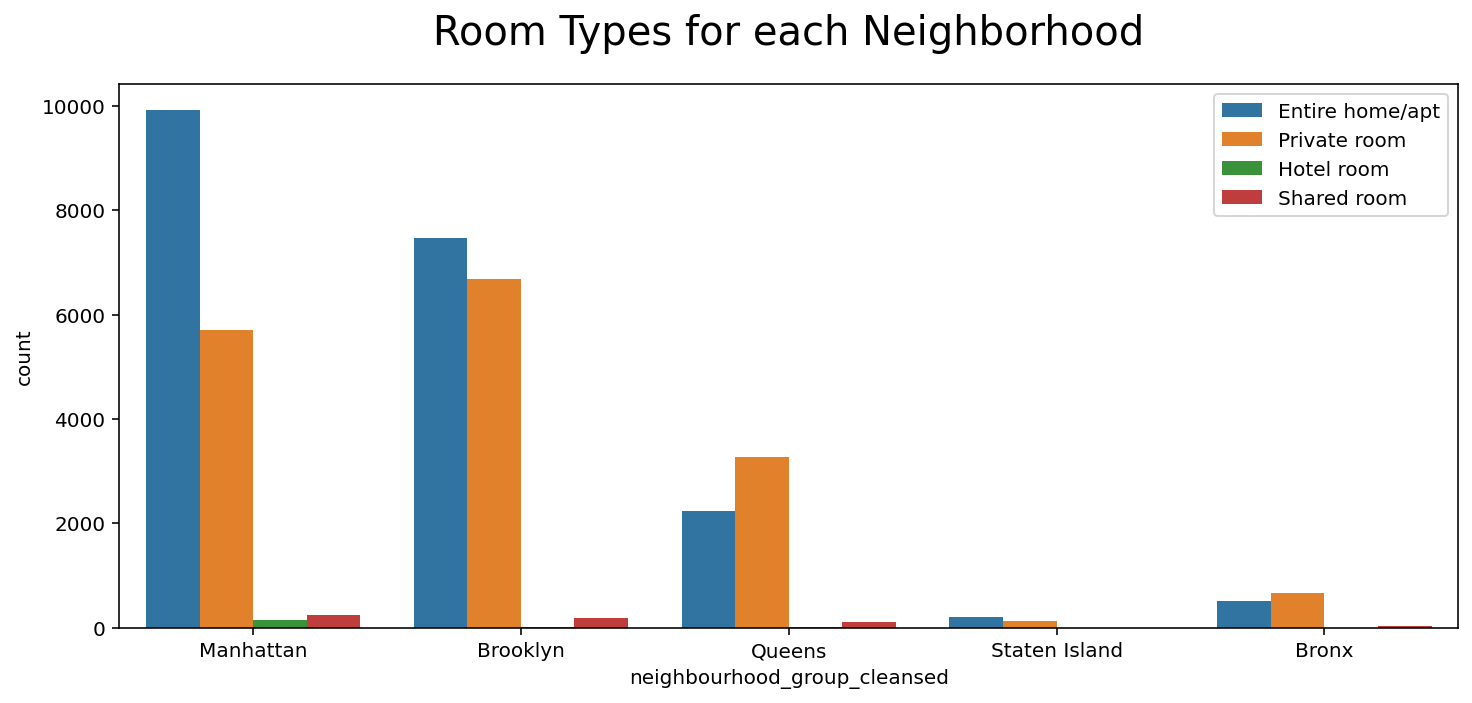

In [41]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x=df['neighbourhood_group_cleansed'],
              hue=df['room_type'])
plt.title('Room Types for each Neighborhood', fontsize=20,y=1.05)
plt.legend(loc='upper right')
plt.show()

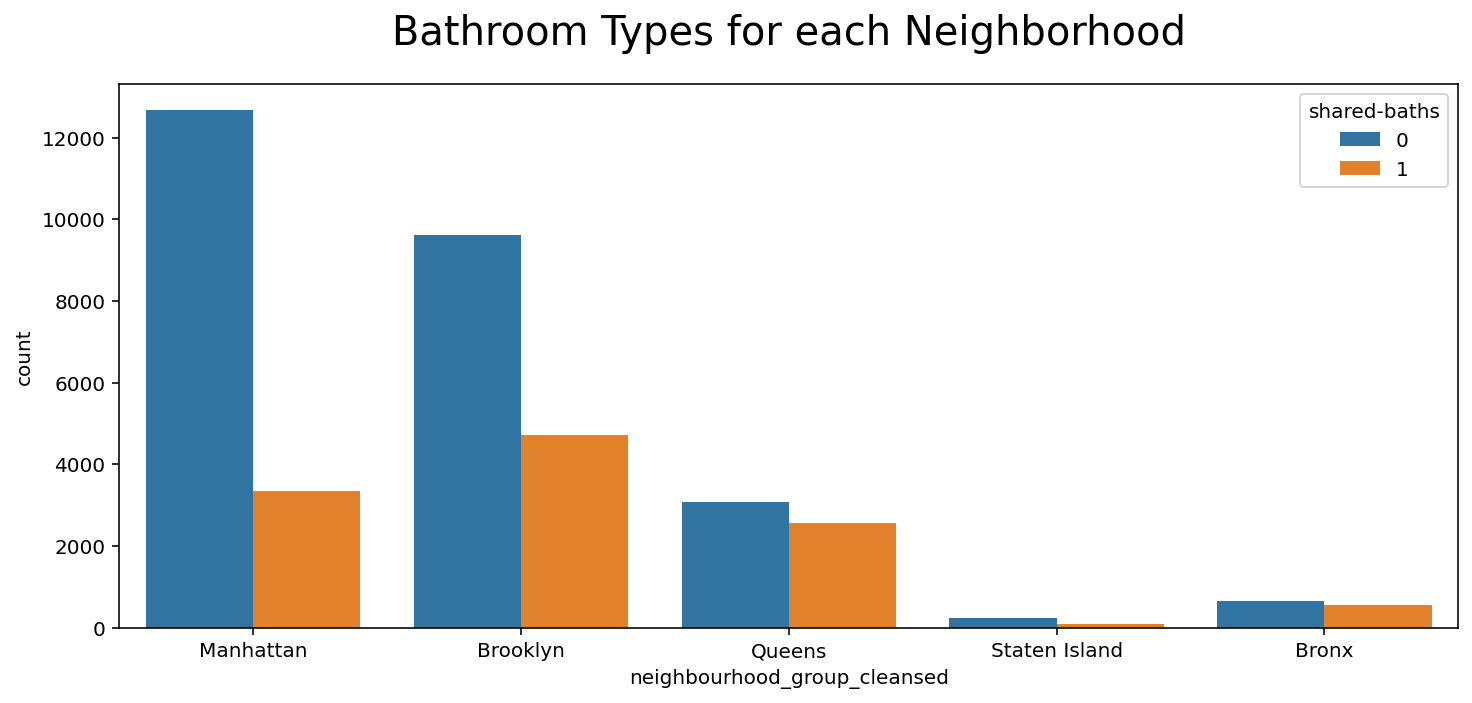

In [42]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x=df['neighbourhood_group_cleansed'],
              hue=df['shared-baths'])
plt.title('Bathroom Types for each Neighborhood', fontsize=20,y=1.05)
plt.show()

### Price vs Beds is separated by neighborhood and point size by the quantity of accommodates.

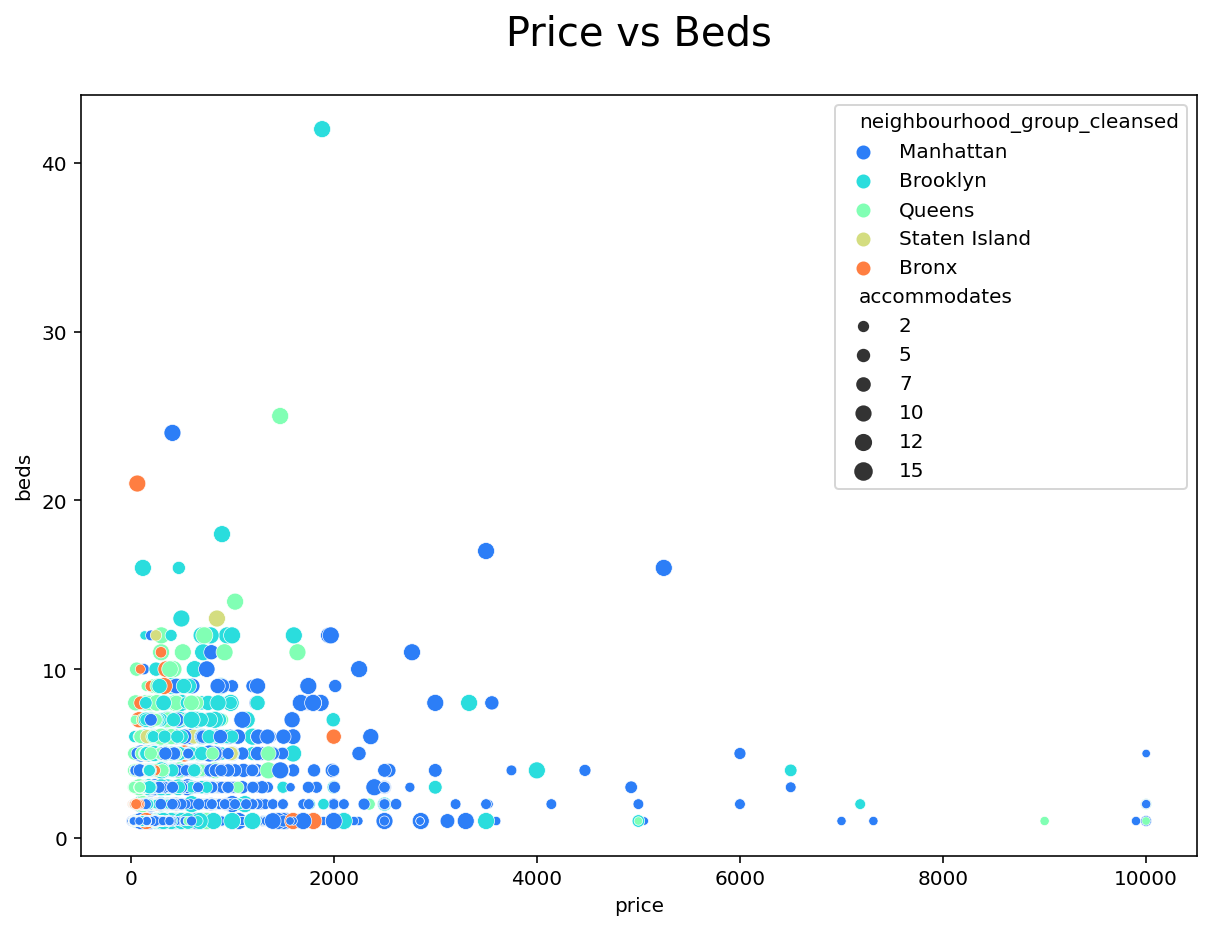

In [43]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(x='price', y='beds', hue='neighbourhood_group_cleansed',
                size='accommodates', palette='rainbow', data=df)
plt.title('Price vs Beds', fontsize=20,y=1.05)
plt.show()

### Price by Neighborhoods

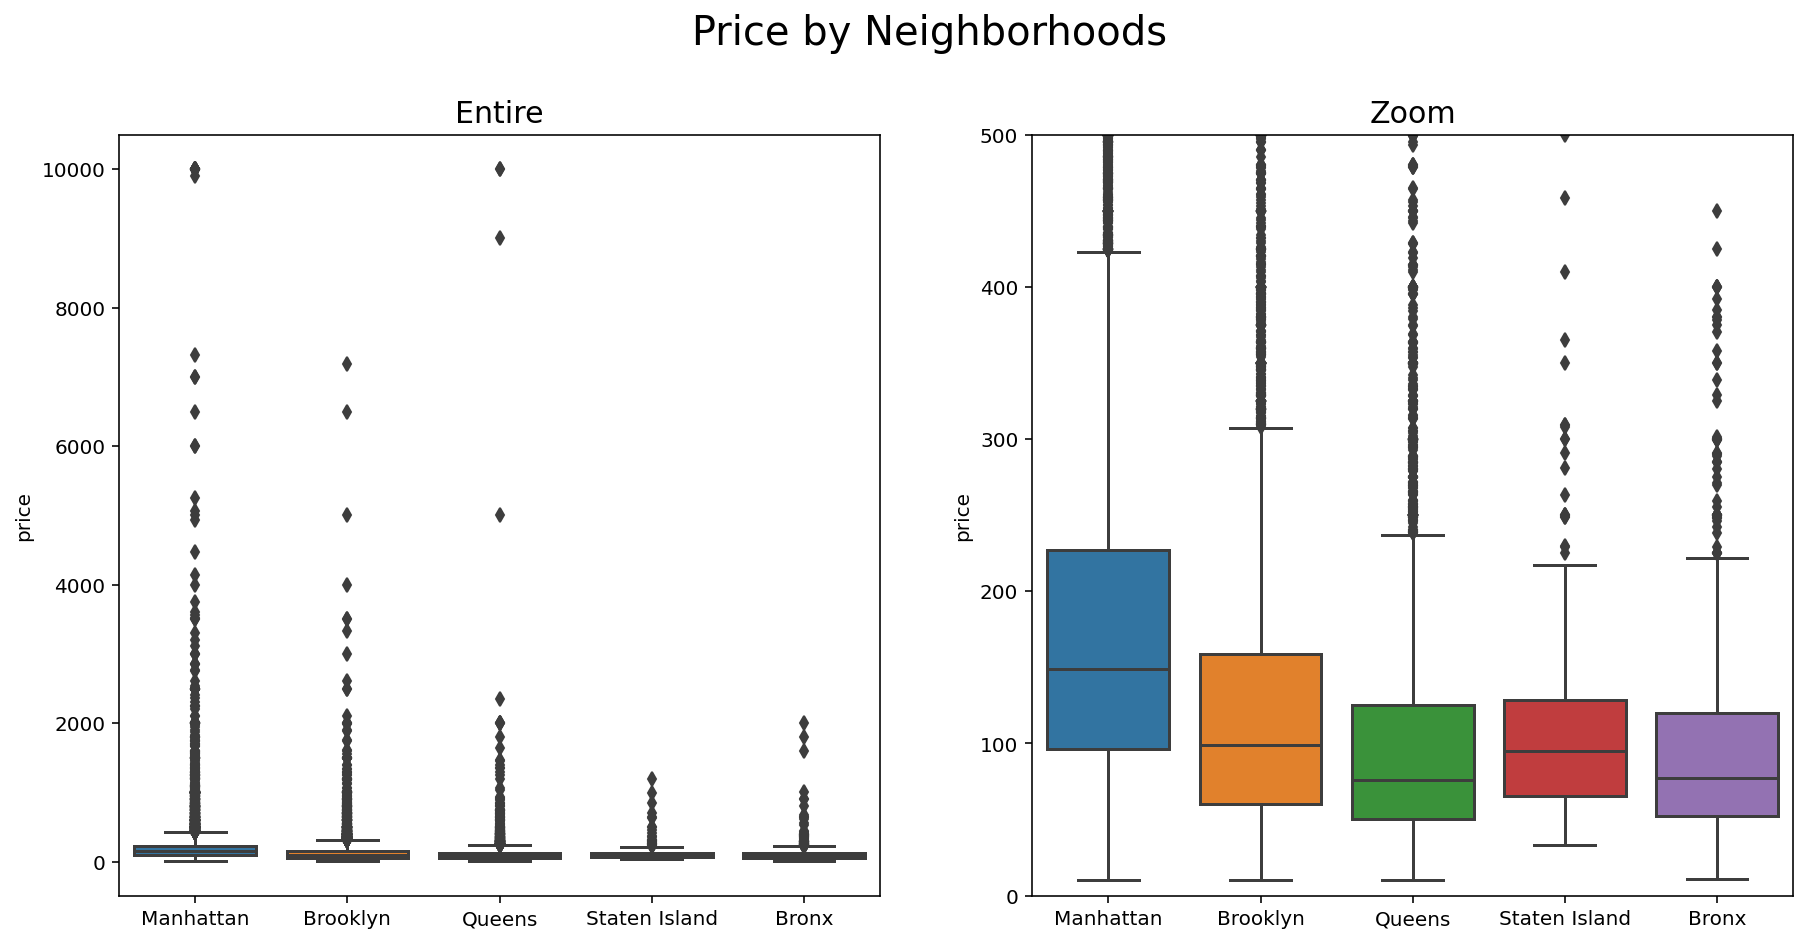

In [44]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

sns.boxplot(x='neighbourhood_group_cleansed',
            y='price', data=df, ax=ax[0])
ax[0].set(xlabel='')
ax[0].set_title('Entire', fontsize=15)
sns.boxplot(x='neighbourhood_group_cleansed',
            y='price', data=df, ax=ax[1])
ax[1].set(xlabel='',ylim=(0,500))
ax[1].set_title('Zoom', fontsize=15)

plt.suptitle('Price by Neighborhoods', fontsize=20, y=1)
plt.show()

### Price by Room Types

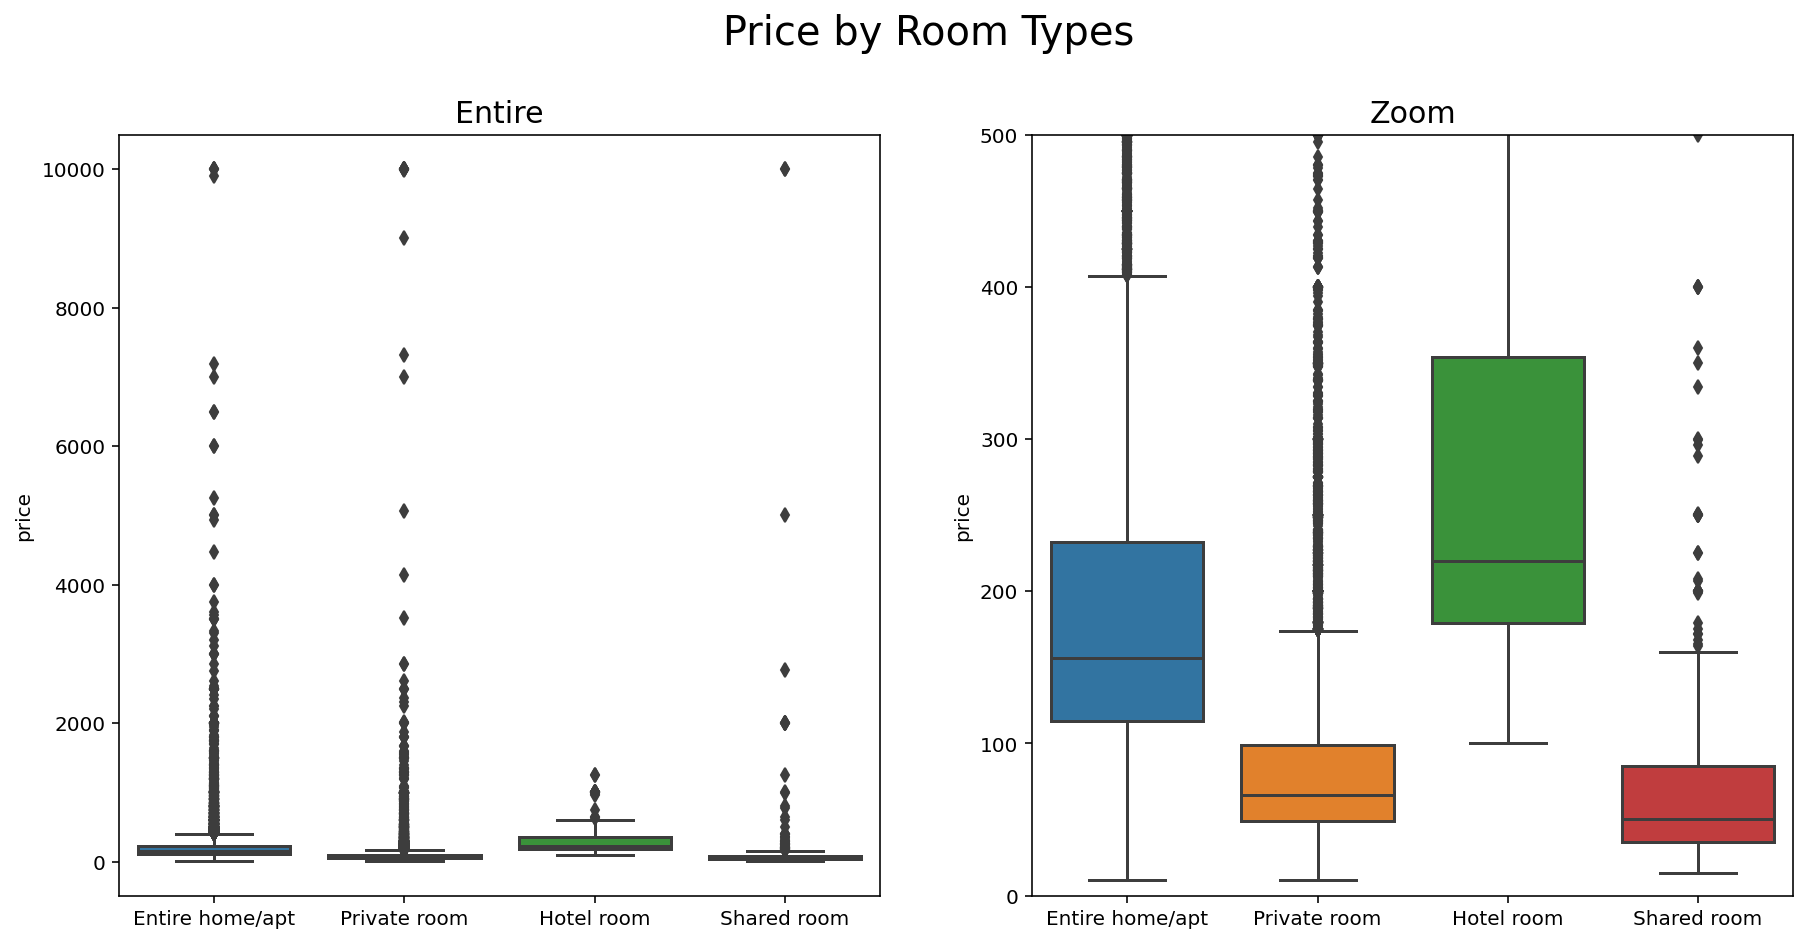

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

sns.boxplot(x='room_type',
            y='price', data=df, ax=ax[0])
ax[0].set(xlabel='')
ax[0].set_title('Entire', fontsize=15)
sns.boxplot(x='room_type',
            y='price', data=df, ax=ax[1])
ax[1].set(xlabel='',ylim=(0,500))
ax[1].set_title('Zoom', fontsize=15)

plt.suptitle('Price by Room Types', fontsize=20, y=1)
plt.show()

### Segmentation of Room Types and Neighborhood

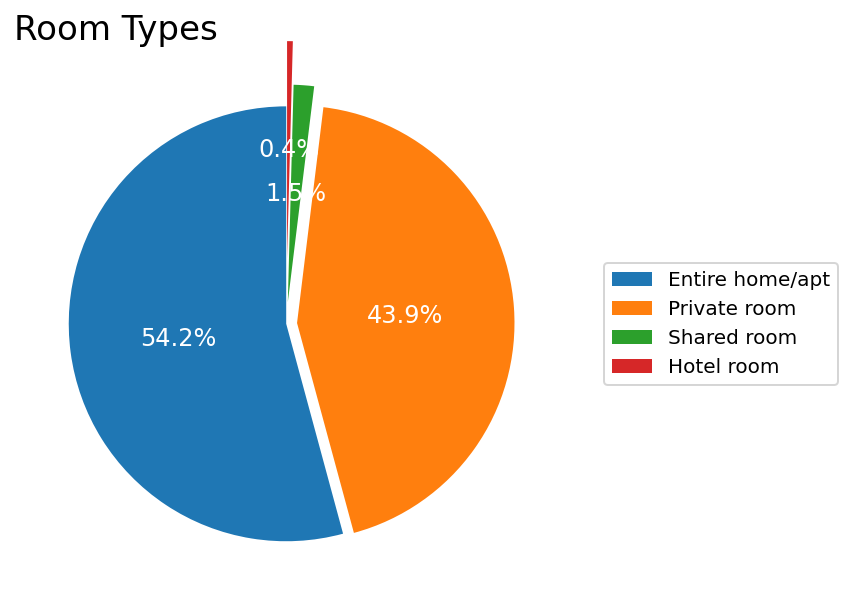

In [46]:
fig = plt.figure(figsize=(7,5))

plt.pie(df['room_type'].value_counts(),
        autopct='%1.1f%%', startangle=90,
        explode=[0,0.05,0.1,0.3],
        pctdistance=0.5,
        textprops=dict(color='w', size=12))

plt.legend(df['room_type'].value_counts().index,
           loc='center', bbox_to_anchor=(1.3,0.5),
           fontsize=10)

plt.title('Room Types',fontsize=17, loc='left')
plt.show()

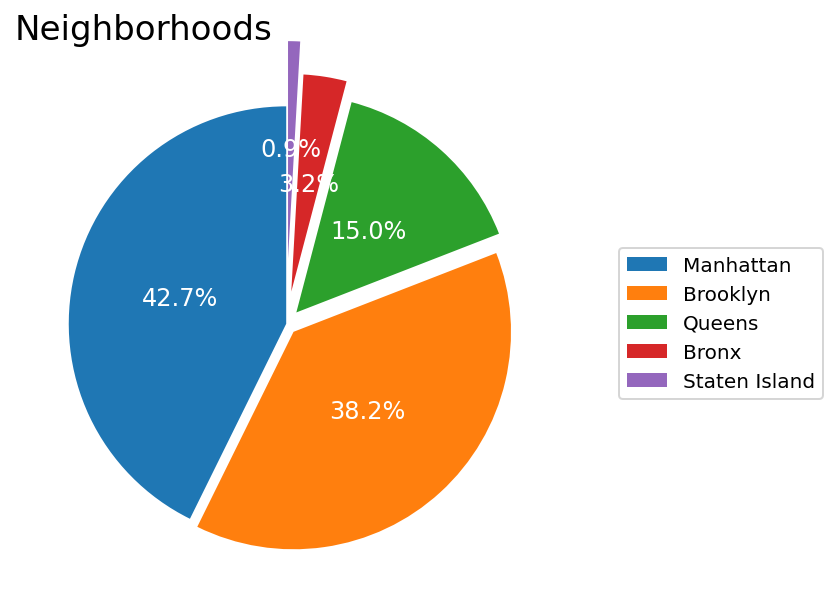

In [47]:
fig = plt.figure(figsize=(7,5))

plt.pie(df['neighbourhood_group_cleansed'].value_counts(),
        autopct='%1.1f%%', startangle=90,
        explode=[0,0.05,0.07,0.15,0.3],
        pctdistance=0.5,
        textprops=dict(color='w', size=12))

plt.legend(df['neighbourhood_group_cleansed'].value_counts().index,
           loc='center', bbox_to_anchor=(1.3,0.5),
           fontsize=10)

plt.title('Neighborhoods',fontsize=17, loc='left')
plt.show()

---
# Kindly continue on the next notebook: (2 of 2) Regression